In [1]:
using Plots,SparseArrays,Arpack

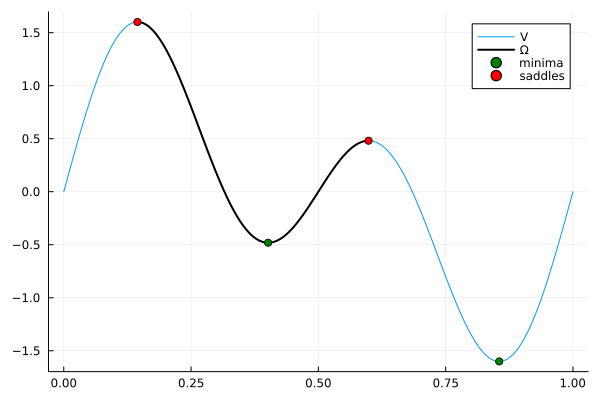

In [29]:
r = 0.8

V(x) = sin(4π*x) + r*sin(2π*x)
V′(x) = 4π*cos(4π*x)+2π*r*cos(2π*x)
V′′(x) = -16π^2*sin(4π*x) - 4π^2*r*sin(2π*x)

mu(x,β) = exp(-β*V(x))

plot(V,0,1,label="V")

N = 20000
Δx = 1/N
X = collect(range(0,1,N+1))
pop!(X)


@inline prev(i) = mod(i-1,1:N)
@inline next(i) = mod(i+1,1:N)


minima = [i for i=1:N if  V(X[prev(i)])>V(X[i])<V(X[next(i)])]
saddles = [i for i=1:N if V(X[prev(i)])<V(X[i])>V(X[next(i)])]

i0,i1 = minima
z0,z1 = saddles

ΔV01 = V(X[z1])-V(X[i0])
ΔV10 = V(X[z1]) - V(X[i1])

killpoint = i1

Ωind = z0:z1 # bassin of i0
#Ωind = mod.(z1-N:z0,(1:N,)) # bassin of i1
#Ωind = [i for i=1:N if i!=killpoint] # everything but coreset
Ω = X[Ωind]

plot(X,V.(X),label="V")
plot!(Ω,V.(Ω),color=:black,linewidth=2,label="Ω")
scatter!(X[minima],V.(X[minima]),color=:green,label="minima")
scatter!(X[saddles],V.(X[saddles]),color=:red,label="saddles")

In [90]:
function eigenproblem(β)
    ħ = sqrt(2β)
    H = @. (β*V′(X)^2/2-V′′(X))/2 # Potential part

    inv_β = inv(β)

    subdiag = fill(-inv_β/Δx^2,N-1)
    diag = fill(2inv_β/Δx^2,N) + H

    M = spdiagm(-1=>subdiag,0=>diag,1=>subdiag)
    Mred = M[Ωind,Ωind]
    λs,us = eigs(Mred,sigma=0,nev=2,which=:LR,tol=1e-30)

    # λs = real.(λs)
    # us = real.(us)

    # return λs[1],λs[2],us[:,1],us[:,2]

    return M
end

eigenproblem (generic function with 1 method)

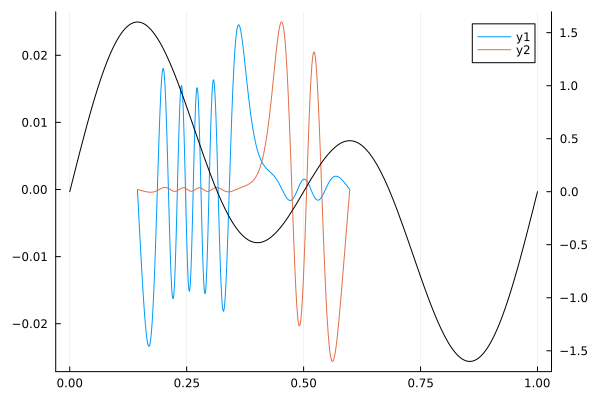

In [88]:
β = 30
M=eigenproblem(β)
λs,us = eigs(M[Ωind,Ωind],which=:LR,nev=2,sigma=-0.01)

u1,u2=us[:,1],us[:,2]

w = exp.(β*V.(Ω)/2)
plot(Ω,u1)
plot(Ω,u1)
plot!(Ω,u2)

plot!(twinx(),V,0,1,label="",color=:black)

In [89]:
λs

2-element Vector{Float64}:
 19.484656150207368
 76.26357415051609